<a href="https://colab.research.google.com/github/devianwahyu/PDS-PA-PrediksiHargaMobil/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deskripsi Tujuan Bisnis

Tujuan dari projek ini adalah untuk memprediksi harga Mobil berdasar:

* Tahun produksi
* Kilometers driven
* Tipe bahan bakar
* Transmisi
* Tipe owner
* Mileage
* Mesin



#Analisa Pendekatan
Pendekatan yang dipakai dalam projek ini adalah pendekatan regresi, lebih tepatnya multiple linear regression. Metode ini cocok digunakan untuk memprediksi suatu nilai berdasarkan variabel terkait.

#Pengumpulan Data

Data diperoleh dari Kaggle. Berikut adalah link-nya: https://www.kaggle.com/avikasliwal/used-cars-price-prediction

#Pemahaman Data

Melakukan impor library yang akan digunakan.

In [45]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import collections
from sklearn.metrics import r2_score
import re
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
%matplotlib inline

Melakukan load data yang akan dipakai.

In [46]:
df_train = pd.read_csv('train-data.csv')

Melakukan cek data apakah sudah ter-load dengan benar, dengan menampilkan 5 data awal dari dataset.

In [47]:
df_train.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Menampilkan info berkaitan dengan dataset.

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


Menampilkan deskripsi dari dataset.

In [49]:
df_train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


Melihat dimansi dari dataset.

In [50]:
df_train.shape

(6019, 14)

#Eksplorasi Data

### Data Preprocessing

Melakukan cek terhadap kolom yang memiliki data null.

In [51]:
df_train.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Menampilkan kolom dengan nilai null dalam bentuk persentase.

In [52]:
(df_train.isnull().sum() / len(df_train)) * 100

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

Mengubah nama kolom Unnamed dengan nama id.

In [53]:
df_train = df_train.rename(columns = {'Unnamed: 0': 'id'})
df_train.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Menampilkan kolom berdasar Seats dan id yang bernilai uniq.

In [54]:
df_train.groupby('Seats')['id'].nunique()

Seats
0.0        1
2.0       16
4.0       99
5.0     5014
6.0       31
7.0      674
8.0      134
9.0        3
10.0       5
Name: id, dtype: int64

Melihat nilai modus dari kolom Seats.

In [55]:
df_train['Seats'].mode()

0    5.0
dtype: float64

Mengubah null value dari kolom dataset dengan nilai modus.

In [56]:
df_train["Seats"].fillna(value = 5.0, inplace=True)
df_train.Seats[df_train.Seats == 0.0] = 5.0
df_train.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                   0
New_Price            5195
Price                   0
dtype: int64

Membersihkan value dari atribut yang tidak dibutuhkan, kemudian menampilkan nilai modus dari kolom Mileage.

In [57]:
df_train.Mileage[df_train.Mileage == '0.0 kmpl'] = np.nan
df_train['Mileage'] = df_train['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
df_train['Mileage'] = df_train['Mileage'].astype(float)
df_train['Mileage'].mode()

0    17.0
dtype: float64

Menggaanti nilai null value dengan modus yang didapatkan.

In [58]:
df_train['Mileage'].fillna(value = 17.0, inplace = True)
df_train.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 36
Power                  36
Seats                   0
New_Price            5195
Price                   0
dtype: int64

Menampilkan kolom dataset berdasar Engine dan id yang uniq.

In [59]:
df_train.groupby('Engine')['id'].nunique()

Engine
1047 CC      4
1061 CC     30
1086 CC    108
1120 CC     54
1150 CC      7
          ... 
970 CC       1
993 CC      14
995 CC      10
998 CC     259
999 CC      29
Name: id, Length: 146, dtype: int64

Menghilangkan atribut yang tidak diperlukan dari suatu value, kemudian mengganti type datanya menjadi float, dan menampilkan modus dari kolom Engine.

In [60]:
df_train['Engine'] = df_train['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_train['Engine'] = df_train['Engine'].astype(float)
df_train['Engine'].mode()

0    1197.0
dtype: float64

Mengganti null value dengan nilai modus.

In [61]:
df_train['Engine'].fillna(value = 1197.0, inplace = True)
df_train.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  36
Seats                   0
New_Price            5195
Price                   0
dtype: int64

Menghilangan atribut yang tidak perlu dari kolom Power, kemudian menampilkan berapa jumlah null value.

In [62]:
df_train['Power'] = df_train['Power'].str.split(' ').str[0]
# including nan rows there is data in this column of 'null' value
df_train.Power[df_train.Power == 'null'] = np.NaN
df_train['Power'].isnull().sum()

143

Mengubah type data dari Power menjasi float, kemudian menampilkan nilai modusnya.

In [63]:
df_train['Power'] = df_train['Power'].astype(float)
df_train['Power'].mode()

0    74.0
dtype: float64

Mengubah null value dari kolom Power menjadi nilai modus yang telah didapatkan.

In [64]:
df_train['Power'].fillna(value = 74, inplace = True)
df_train.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

Membersihkan atribut tidak dipakai dari value kolom Name, kemudian menampilkan isi berdasar Name dan id yang uniq.

In [65]:
df_train['Name'] = df_train['Name'].str.split(' ').str[0]
df_train.groupby('Name')['id'].nunique()

Name
Ambassador          1
Audi              236
BMW               267
Bentley             1
Chevrolet         121
Datsun             13
Fiat               28
Force               3
Ford              300
Honda             608
Hyundai          1107
ISUZU               2
Isuzu               1
Jaguar             40
Jeep               15
Lamborghini         1
Land               60
Mahindra          272
Maruti           1211
Mercedes-Benz     318
Mini               26
Mitsubishi         27
Nissan             91
Porsche            18
Renault           145
Skoda             173
Smart               1
Tata              186
Toyota            411
Volkswagen        315
Volvo              21
Name: id, dtype: int64

Mengubah nama isuzu menjadi ISUZU

In [66]:
df_train.Name[df_train.Name == 'Isuzu'] = 'ISUZU'

Menghapus kolom New_Price.

In [67]:
del df_train['New_Price']

Melakukan copy dataset df_train ke dataset.

In [68]:
dataset = df_train.copy()

Menghapus kolom id dari df_train.

In [69]:
del df_train['id']

Menampilkan type data dari masing-masing kolom df_train.

In [70]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

Mengubah tipe data dari Year dan Kilometers_Driven menjadi float.

In [71]:
df_train['Year'] = df_train['Year'].astype(float)
df_train['Kilometers_Driven'] = df_train['Kilometers_Driven'].astype(float)

Menyimpan nilai Price ke kolom baru bernama Price_log, kemudian menghapus kolom Price.

In [72]:
df_train['Price_log'] = np.log1p(df_train['Price'].values)
del df_train['Price']

### Visualisasi Dataset

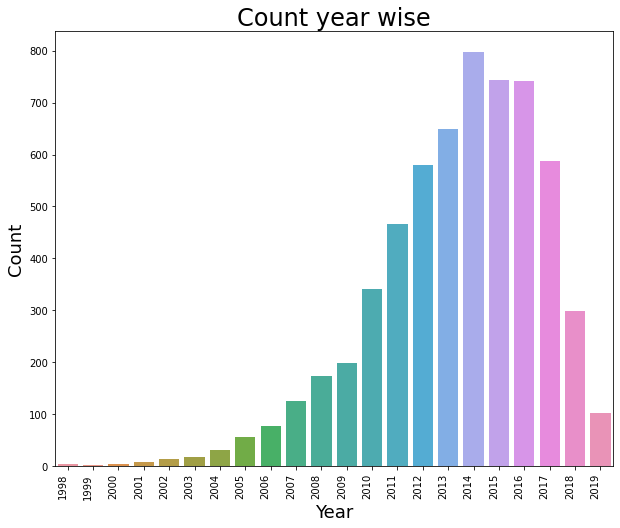

In [73]:
plt.figure(figsize = (10,8))
bar1 = sns.countplot(dataset['Year'])
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Count year wise', size = 24)
plt.xlabel('Year', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

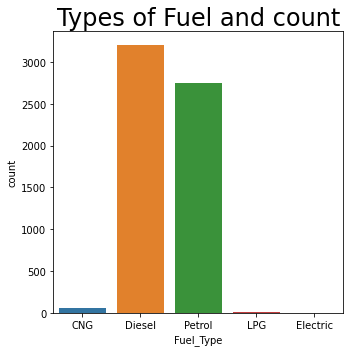

In [74]:
plt.figure(figsize = (5,5))
sns.countplot(dataset['Fuel_Type'])
plt.title('Types of Fuel and count', size = 24)
plt.tight_layout()
plt.show()

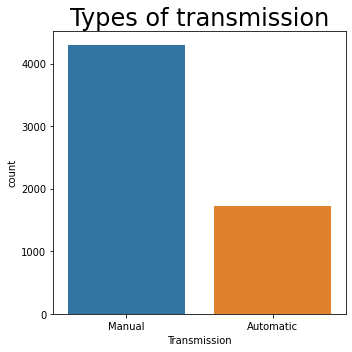

In [75]:
plt.figure(figsize = (5,5))
sns.countplot(dataset['Transmission'])
plt.title('Types of transmission', size = 24)
plt.tight_layout()
plt.show()

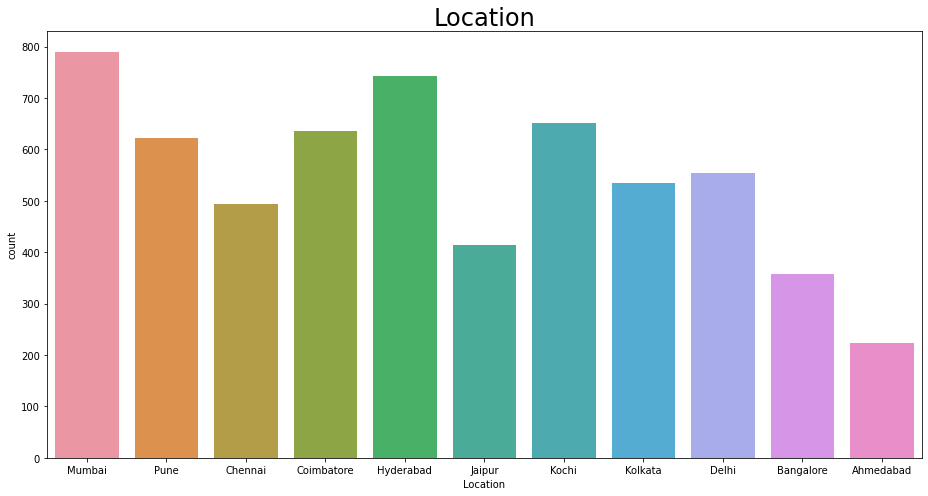

In [76]:
plt.figure(figsize = (13,7))
sns.countplot(dataset['Location'])
plt.title('Location', size = 24)
plt.tight_layout()
plt.show()

# Pemodelan Data

### Model Linear Regression

In [77]:
df_train = pd.get_dummies(df_train, drop_first = True)

In [78]:
X = df_train.drop(columns = ['Price_log'], axis = 1)
y = df_train.iloc[:, 6].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [80]:
regressor_1 = LinearRegression()
regressor_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
y_pred_1 = regressor_1.predict(X_test)

In [82]:
regressor_1.score(X_test,y_test)

0.9224124177741444

### Model Random Forest Tree Regression

In [83]:
regressor_2 = RandomForestRegressor(random_state = 0)
regressor_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [84]:
y_pred_2 = regressor_2.predict(X_test)

In [85]:
regressor_2.score(X_test,y_test)

0.9433713928852715

### Evalusai

Setelah dilakukan uji pada model, ditemukan bahwa model Random Forest Tree Regression lebih baik dibandingkan dengan Linear Regression